In [3]:
import lib.csv_helpers as csv
from IPython.display import display
import shutil
import os

#Delete any existing dummy data
if os.path.exists('dummydata'):
    shutil.rmtree('dummydata')

## Generate Dummy Data
for testing / demo purposes.

In [ ]:
import lib.csv_helpers as csv
from IPython.display import display
import lib.json_setup as json_setup

print("Generating metadata run list with the following settings")

# Start with the example setup dictionary
setup = csv.get_default_setup()

run_df = csv.generate_run_df(setup)
display(run_df)
# Iterate through the run_df calling dummy_measurement for each row,
# Stores the results in the path/subdirs defined in setup. 
csv.run_measure(setup, run_df, measure_func=csv.dummy_measurement)


## List Serial Ports
To find thorlabs stage

In [4]:
import serial.tools.list_ports
ports = serial.tools.list_ports.comports()
n =1 
for port, desc, hwid in sorted(ports):
    print(f"{n}) {port}: {desc} [{hwid}]")
    n+=1

1) COM3: USB Serial Device (COM3) [USB VID:PID=043E:9A39 SER=003NTWG4H009 LOCATION=1-3.4:x.1]


In [1]:
import lib.csv_helpers as csv
from IPython.display import display
import lib.json_setup as json_setup
from lib.stellarnet_thorlabs import Stellarnet_Thorlabs_Hardware

# Start with the example setup dictionary
setup = csv.get_default_setup()

# Customisations to the setup file
setup['input_config']['repeats'] = 1
setup['input_config']['fluids'] = ['waterA']
setup['input_config']['elements'] = ['A01', 'A02']

print('setting up hardware')

hw = Stellarnet_Thorlabs_Hardware(setup, serial_port=None)

print("Generating metadata run list with the following settings")
run_df = csv.generate_run_df(setup)
display(run_df)

# Iterate through the run_df calling dummy_measurement for each row,
# Stores the results in the path/subdirs defined in setup. 
csv.run_measure(setup, run_df, measure_func=hw.measure)

INFO:root:thorlabs serial port not specified


setting up hardware
Generating metadata run list with the following settings


,date,instrument,sensor,element,structure,surface,fluid,repeats,comment
index,,,,,,,,,
default_sensor-A01-waterA,NaT,default_instrument,default_sensor,A01,Al,None,waterA,1,
default_sensor-A02-waterA,NaT,default_instrument,default_sensor,A02,Au,None,waterA,1,


INFO:root:

Measuring Element A01
INFO:root:x_pos=0.1 y_pos=0.1
INFO:root:wl_min=400 wl_max=420
INFO:root:waiting for stage to move
INFO:root:generating dummy spectrum
INFO:root:Merging into existing dummydata\default_sensor\waterA\default_sensor-A01-waterA.txt
INFO:root:

Measuring Element A02
INFO:root:x_pos=0.1 y_pos=0.2
INFO:root:wl_min=400 wl_max=420
INFO:root:waiting for stage to move
INFO:root:generating dummy spectrum
INFO:root:Merging into existing dummydata\default_sensor\waterA\default_sensor-A02-waterA.txt
INFO:root:Merging into existing dummydata\index.txt


## Process and Plot data

sensor: default_sensor
fluid: waterA


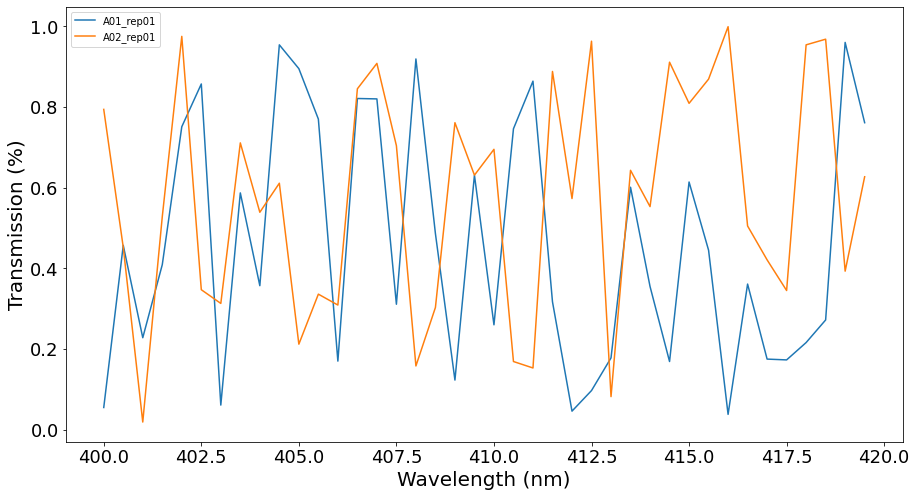

In [14]:
import lib.data_process

meta_df = csv.read_metadata(setup)

dp = lib.data_process.DataProcessor()
dp.apply_interpolate = False
dp.apply_normalise = False
dp.apply_trim = False
dp.apply_smooth = False
dp.wavelength_trim_min = 540
dp.wavelength_trim_max = 730

# meta_df = csv.select_from_metadata('element', 'A01', meta_df)

merged_df, title = csv.merge_dataframes(setup, meta_df)
df = dp.process_dataframe(merged_df)
print(title)
df

lib.data_process.plot(df)